# Decision Tree - Heart Disease Predictions

## 1. Import Modules and Data

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import tree
import graphviz
from sklearn.preprocessing import LabelEncoder

For this notebook we will use the <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease" >Heart Disease Dataset from the UCI Machine Learning Repository</a>, where we will predict whether someone has heart disease or not based on their gender, age and other metrics. 

In [264]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

In [265]:
df = pd.read_csv("processed.cleveland.data", names=column_names)

In [266]:
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0

In [267]:
df.tail()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  num  
298    2.0  0.0  7.0    1  
299    2.0  2.0  7.0    2  
300    2.0  1.0  7.0    3  
301    2.0  1.0  3.0    1  
302    1.0    ?  3.0    0

## 2. Data Exploration, Cleaning and Wrangling

After loading the data, the first step is always to get an idea of what the data looks like and how it's structured. That should give us an idea on how to clean it, as well as what models to use. 

In [268]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

## Dealing with missing data

Some entries are incomplete, and are marked with `?`. To facilitate downstream analysis, we have to find and deal with the missing data.
In this case, we will turn all incomplete data to Nan value.

In [269]:
df = df.replace('?', np.nan)
df = df.dropna()
df = df.astype(float)

In [270]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

Because the lables are just 0 and 1, we turn all values that are greater than 1 into 1.

In [271]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

## Split data into dependent and independent variables

In [272]:
X = df.drop('num', axis=1)
y = df['num']

print(f"Dataset shape: {X.shape}, Label distribution:\n{y.value_counts()}")

Dataset shape: (297, 13), Label distribution:
num
0    160
1    137
Name: count, dtype: int64


## 3. Prepare Train/Test Splits

In [273]:
subsets = []
split_ratios = [0.4, 0.6, 0.8, 0.9] 

In [274]:
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=ratio, stratify=y, shuffle=True, random_state=42
    )
    subsets.append((X_train, X_test, y_train, y_test))

## Visualize lable distribution

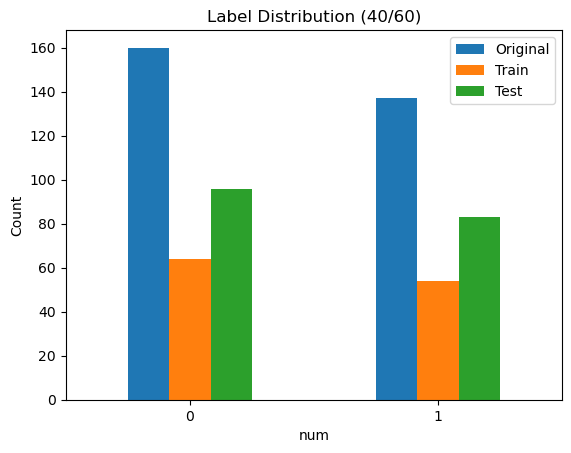

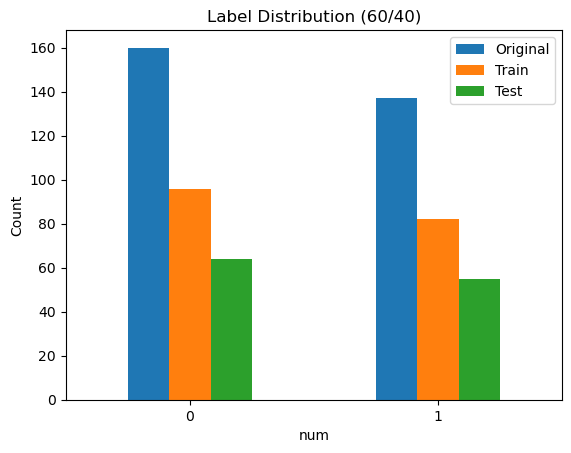

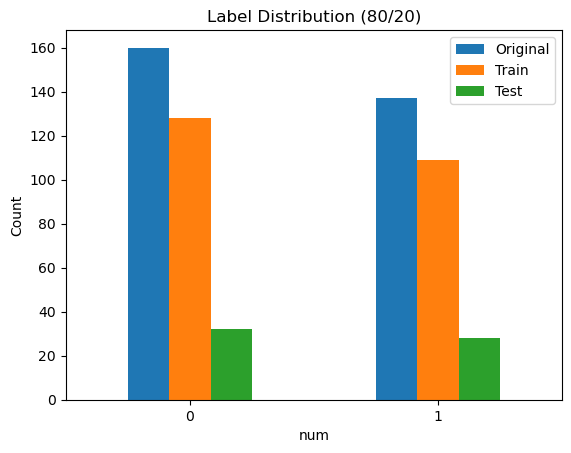

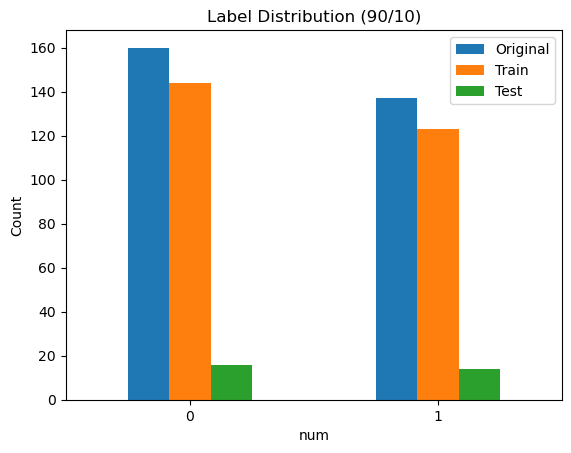

In [275]:
def plot_label_distribution(y_original, y_train, y_test, title):
    counts = pd.DataFrame({
        'Original': y_original.value_counts(),
        'Train': y_train.value_counts(),
        'Test': y_test.value_counts()
    })
    counts.plot(kind='bar', rot=0)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

for idx, (X_train, X_test, y_train, y_test) in enumerate(subsets):
    title = f"Label Distribution ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})"
    plot_label_distribution(y, y_train, y_test, title)

## 4. Train Decision Trees

## Building the decision tree classifiers

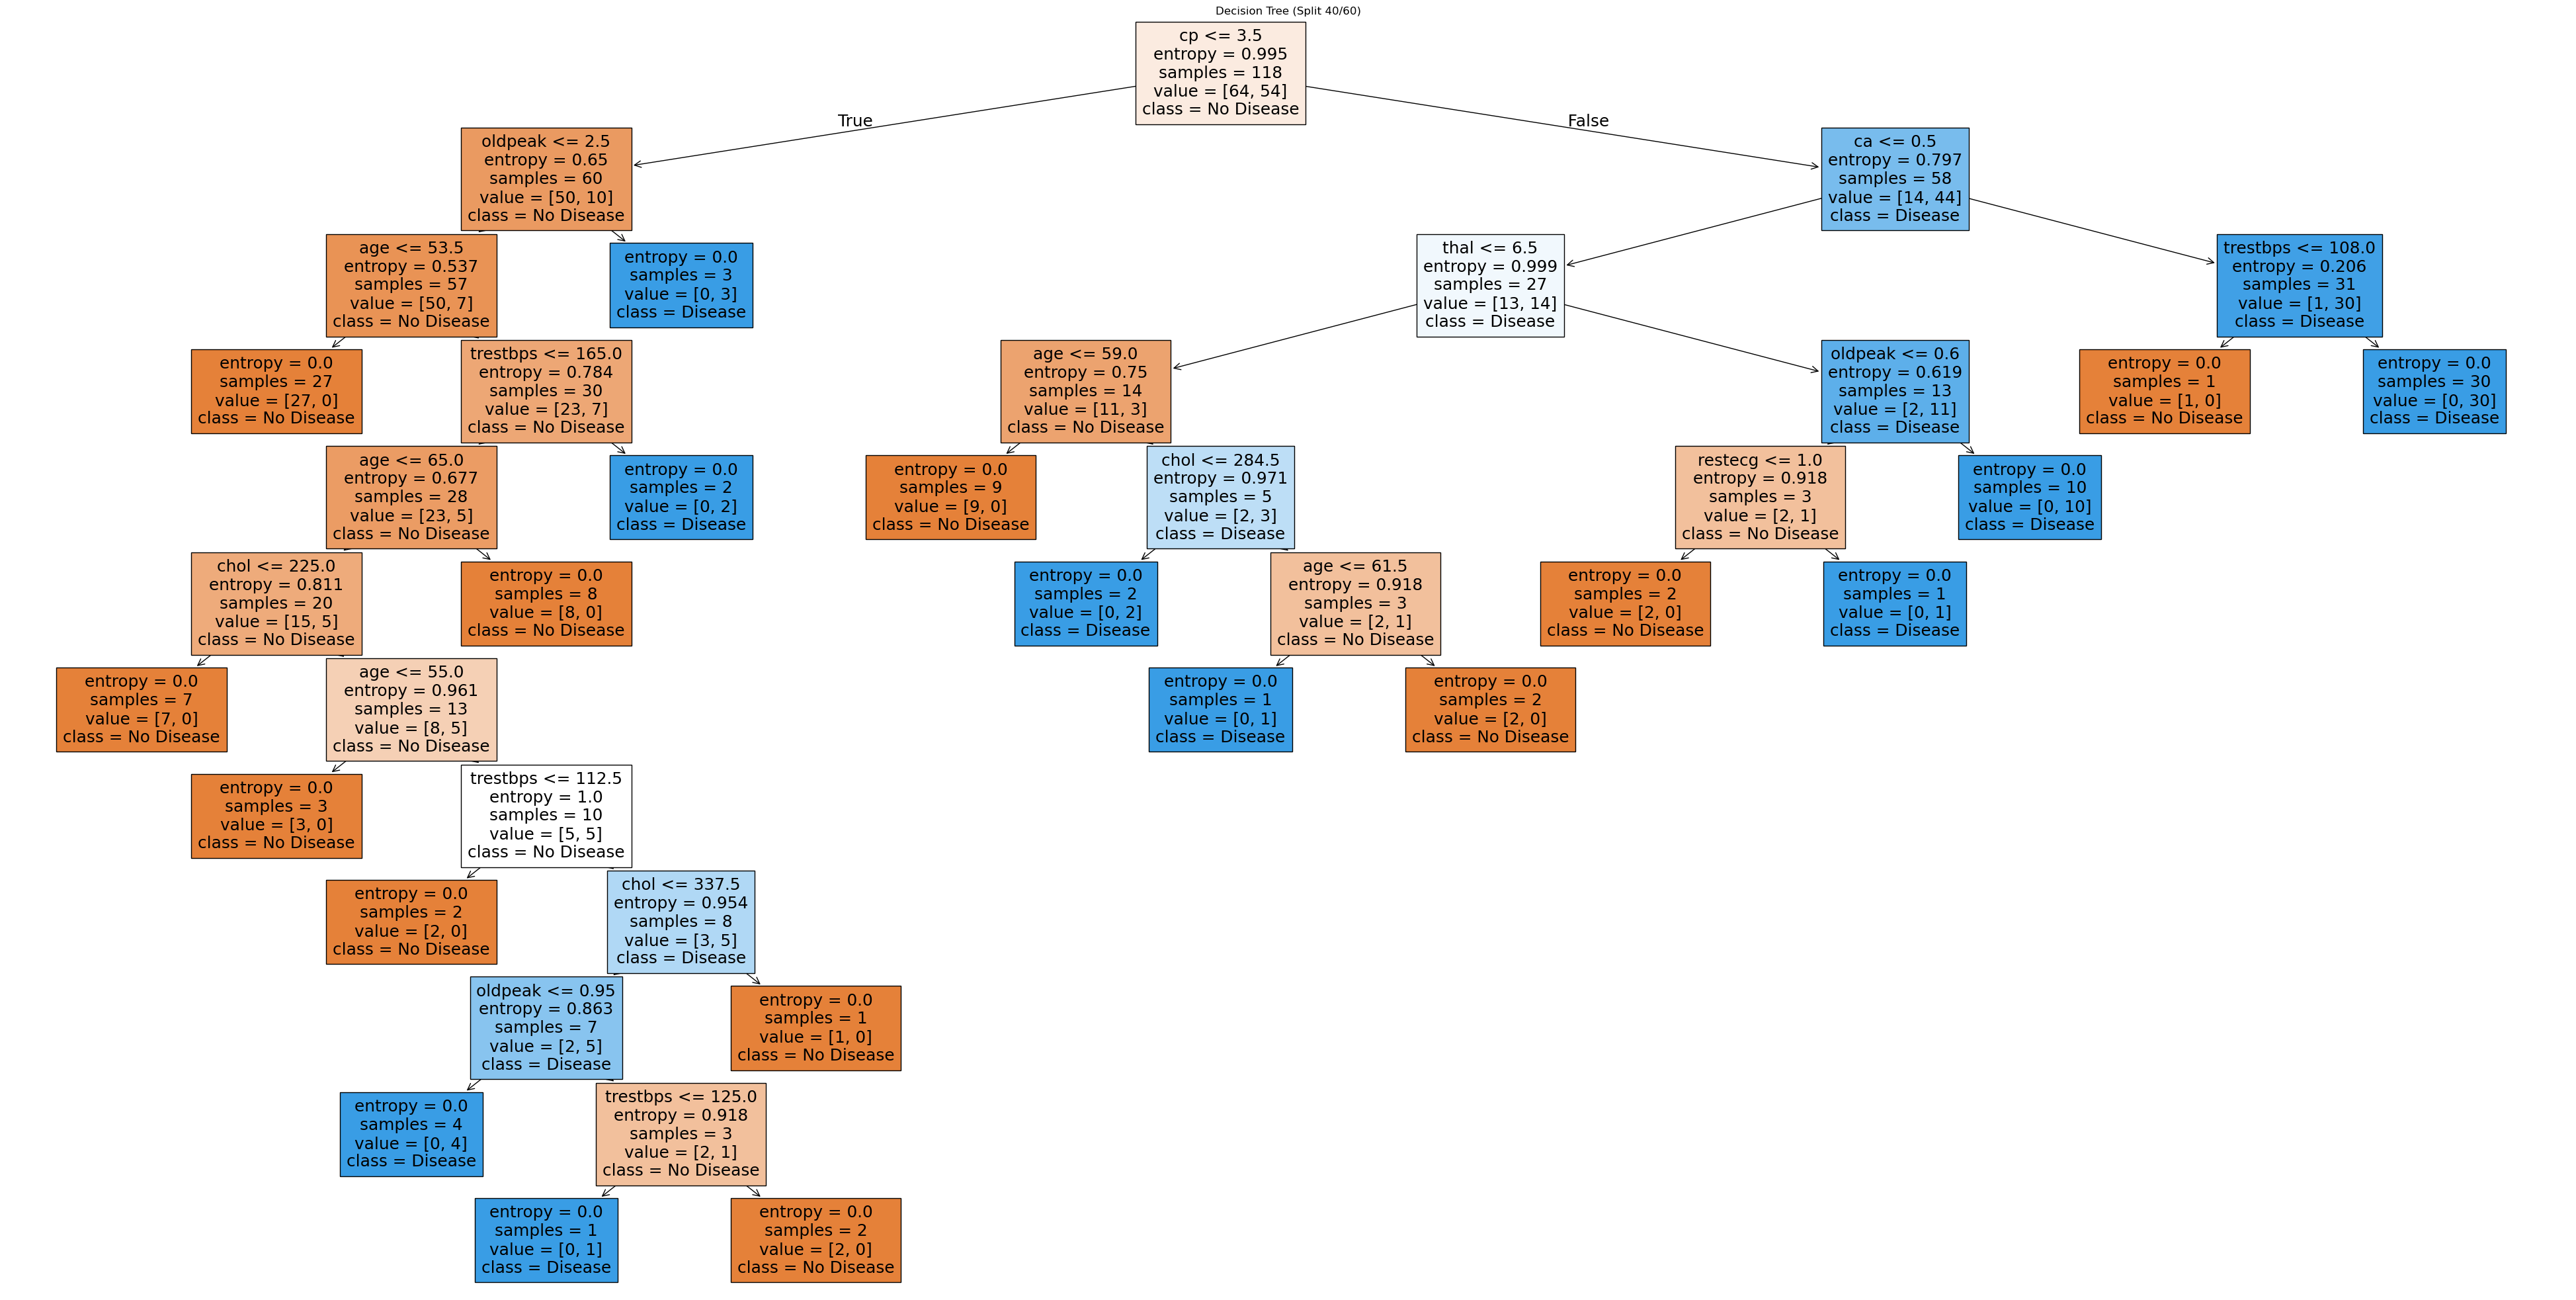

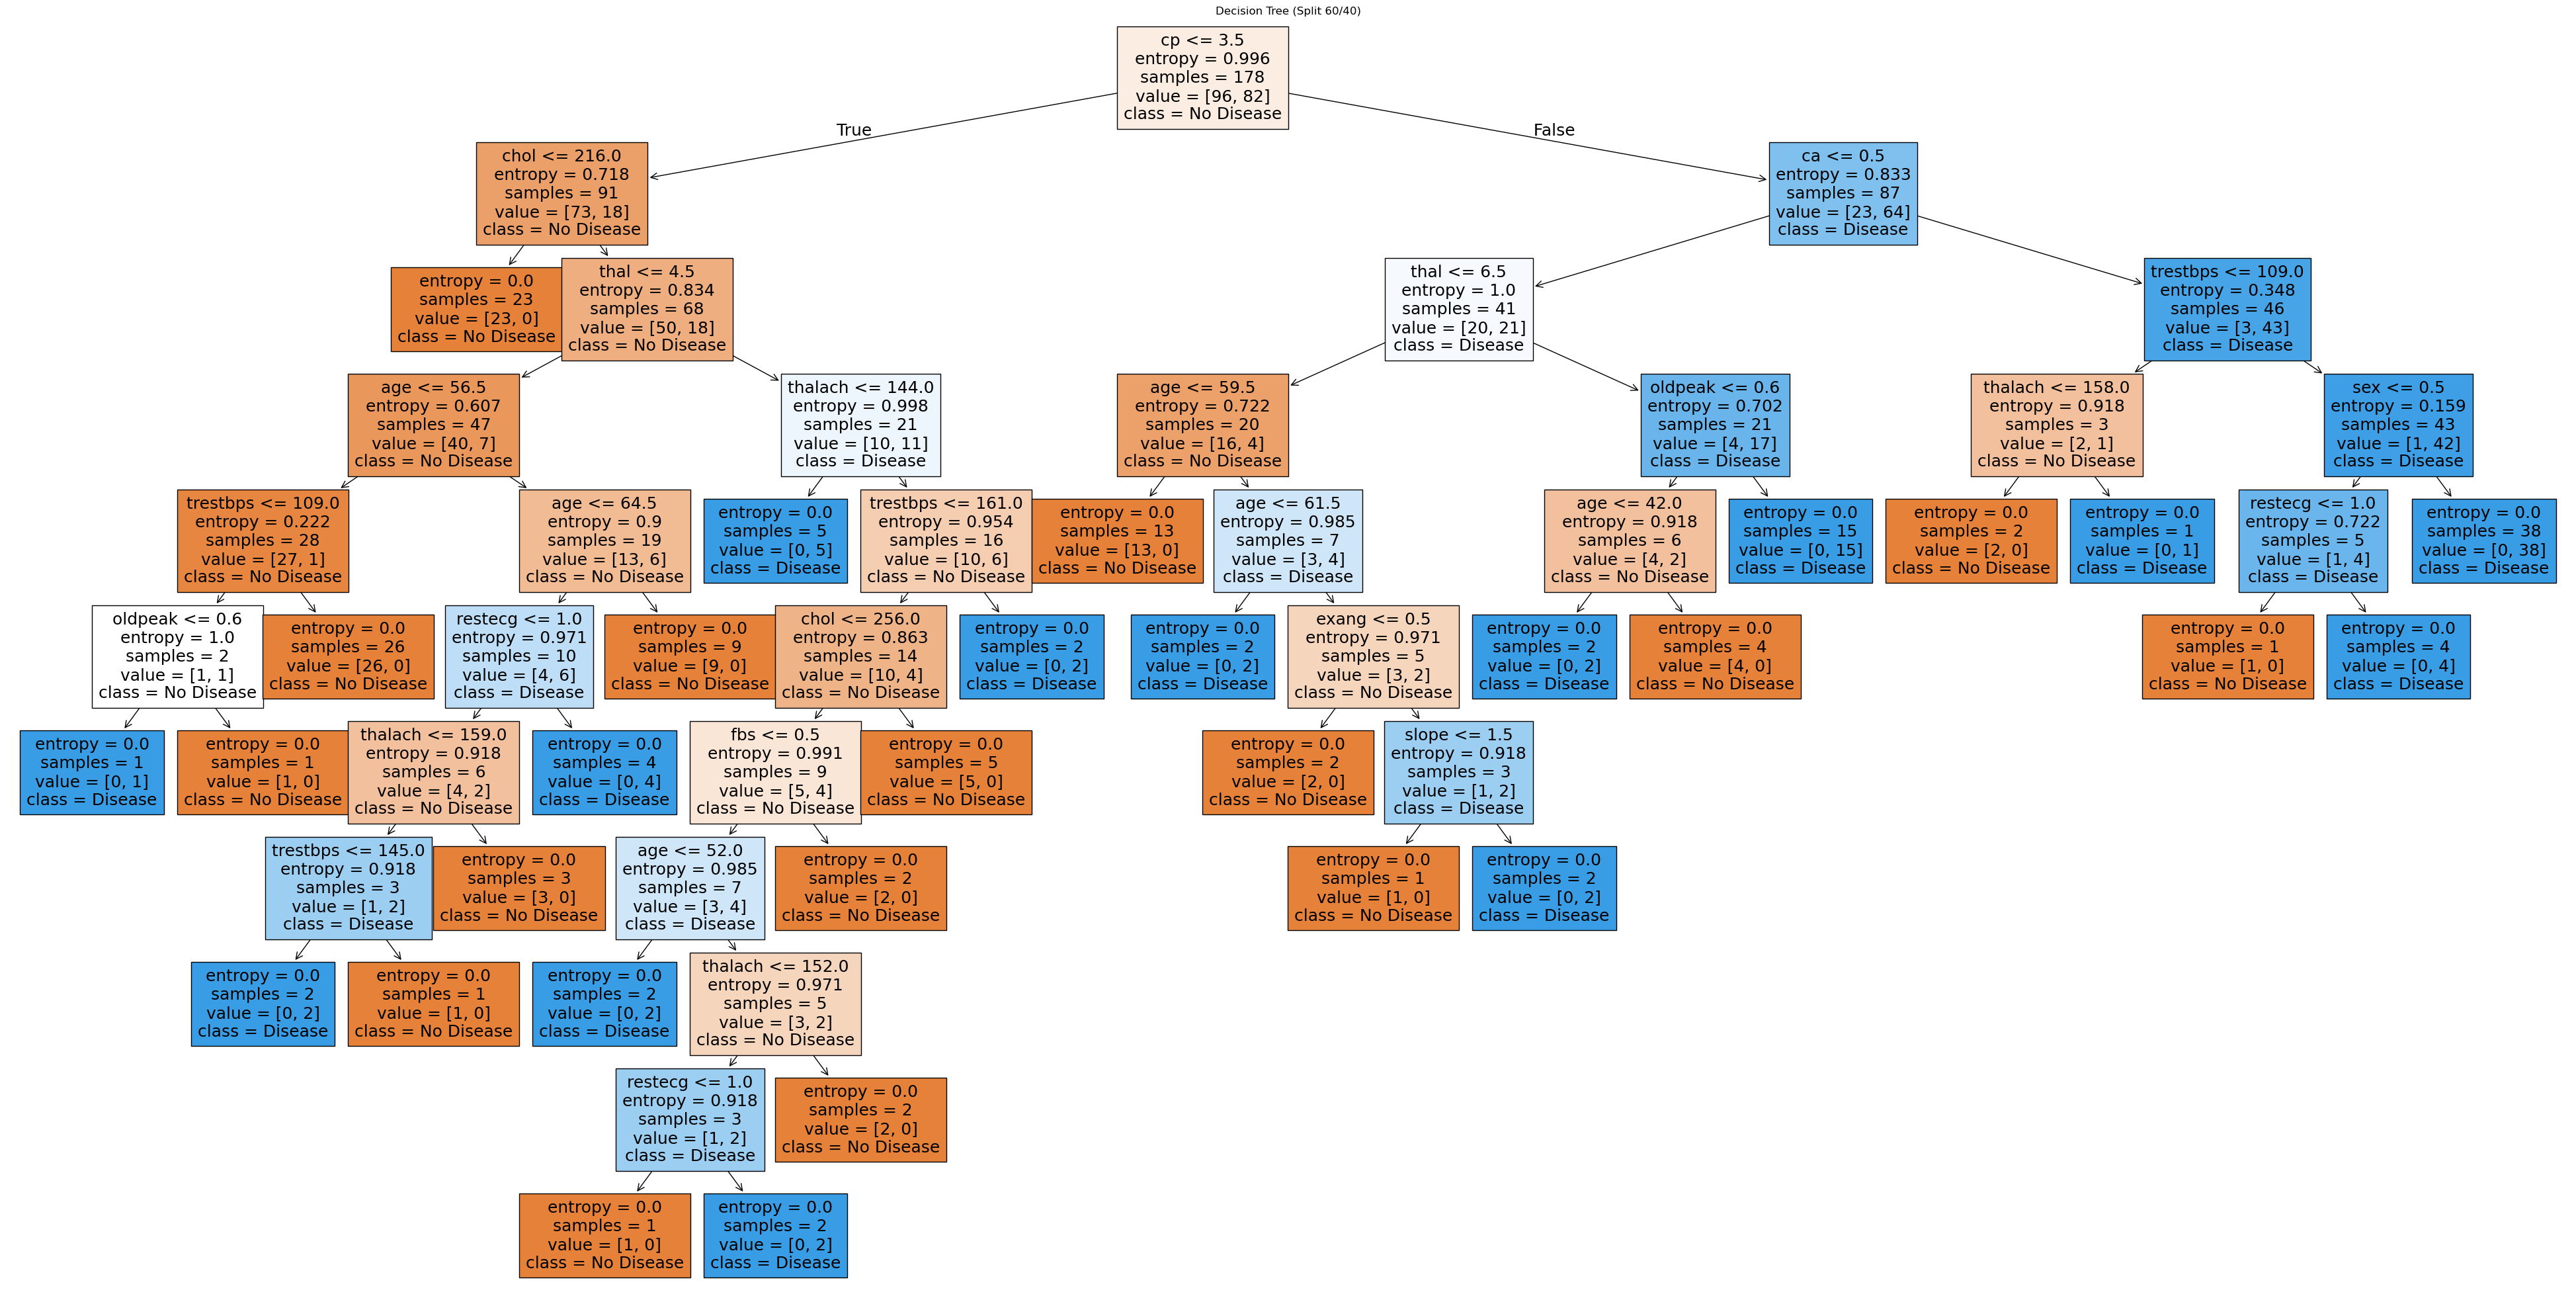

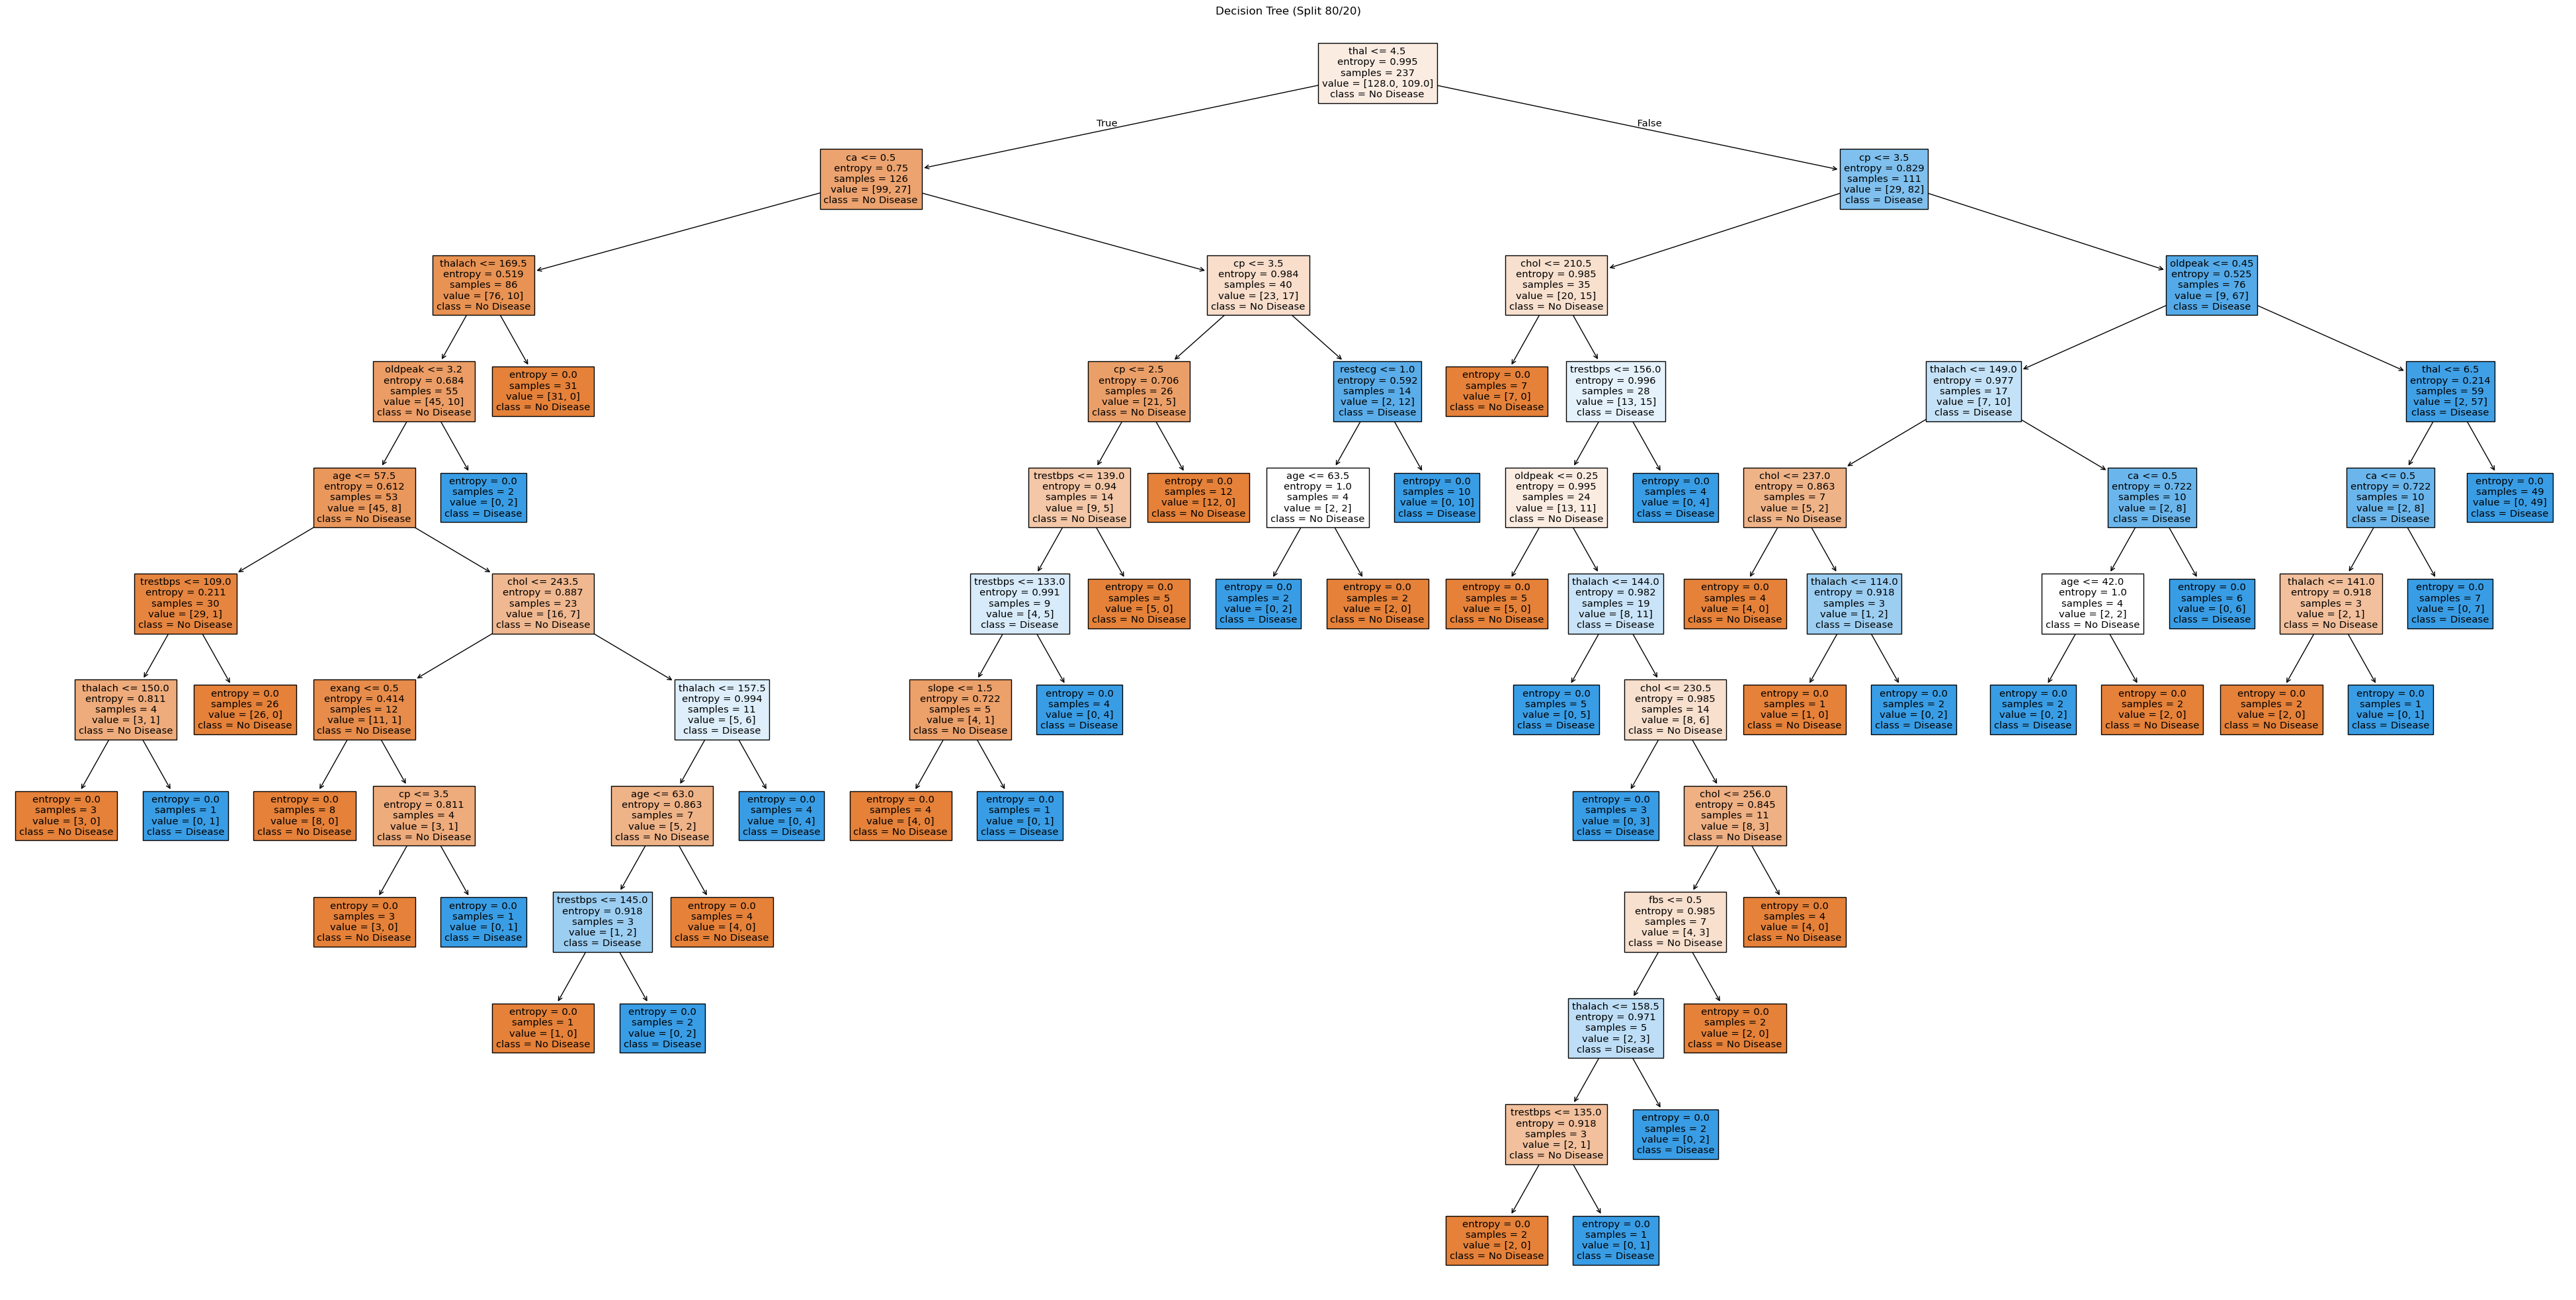

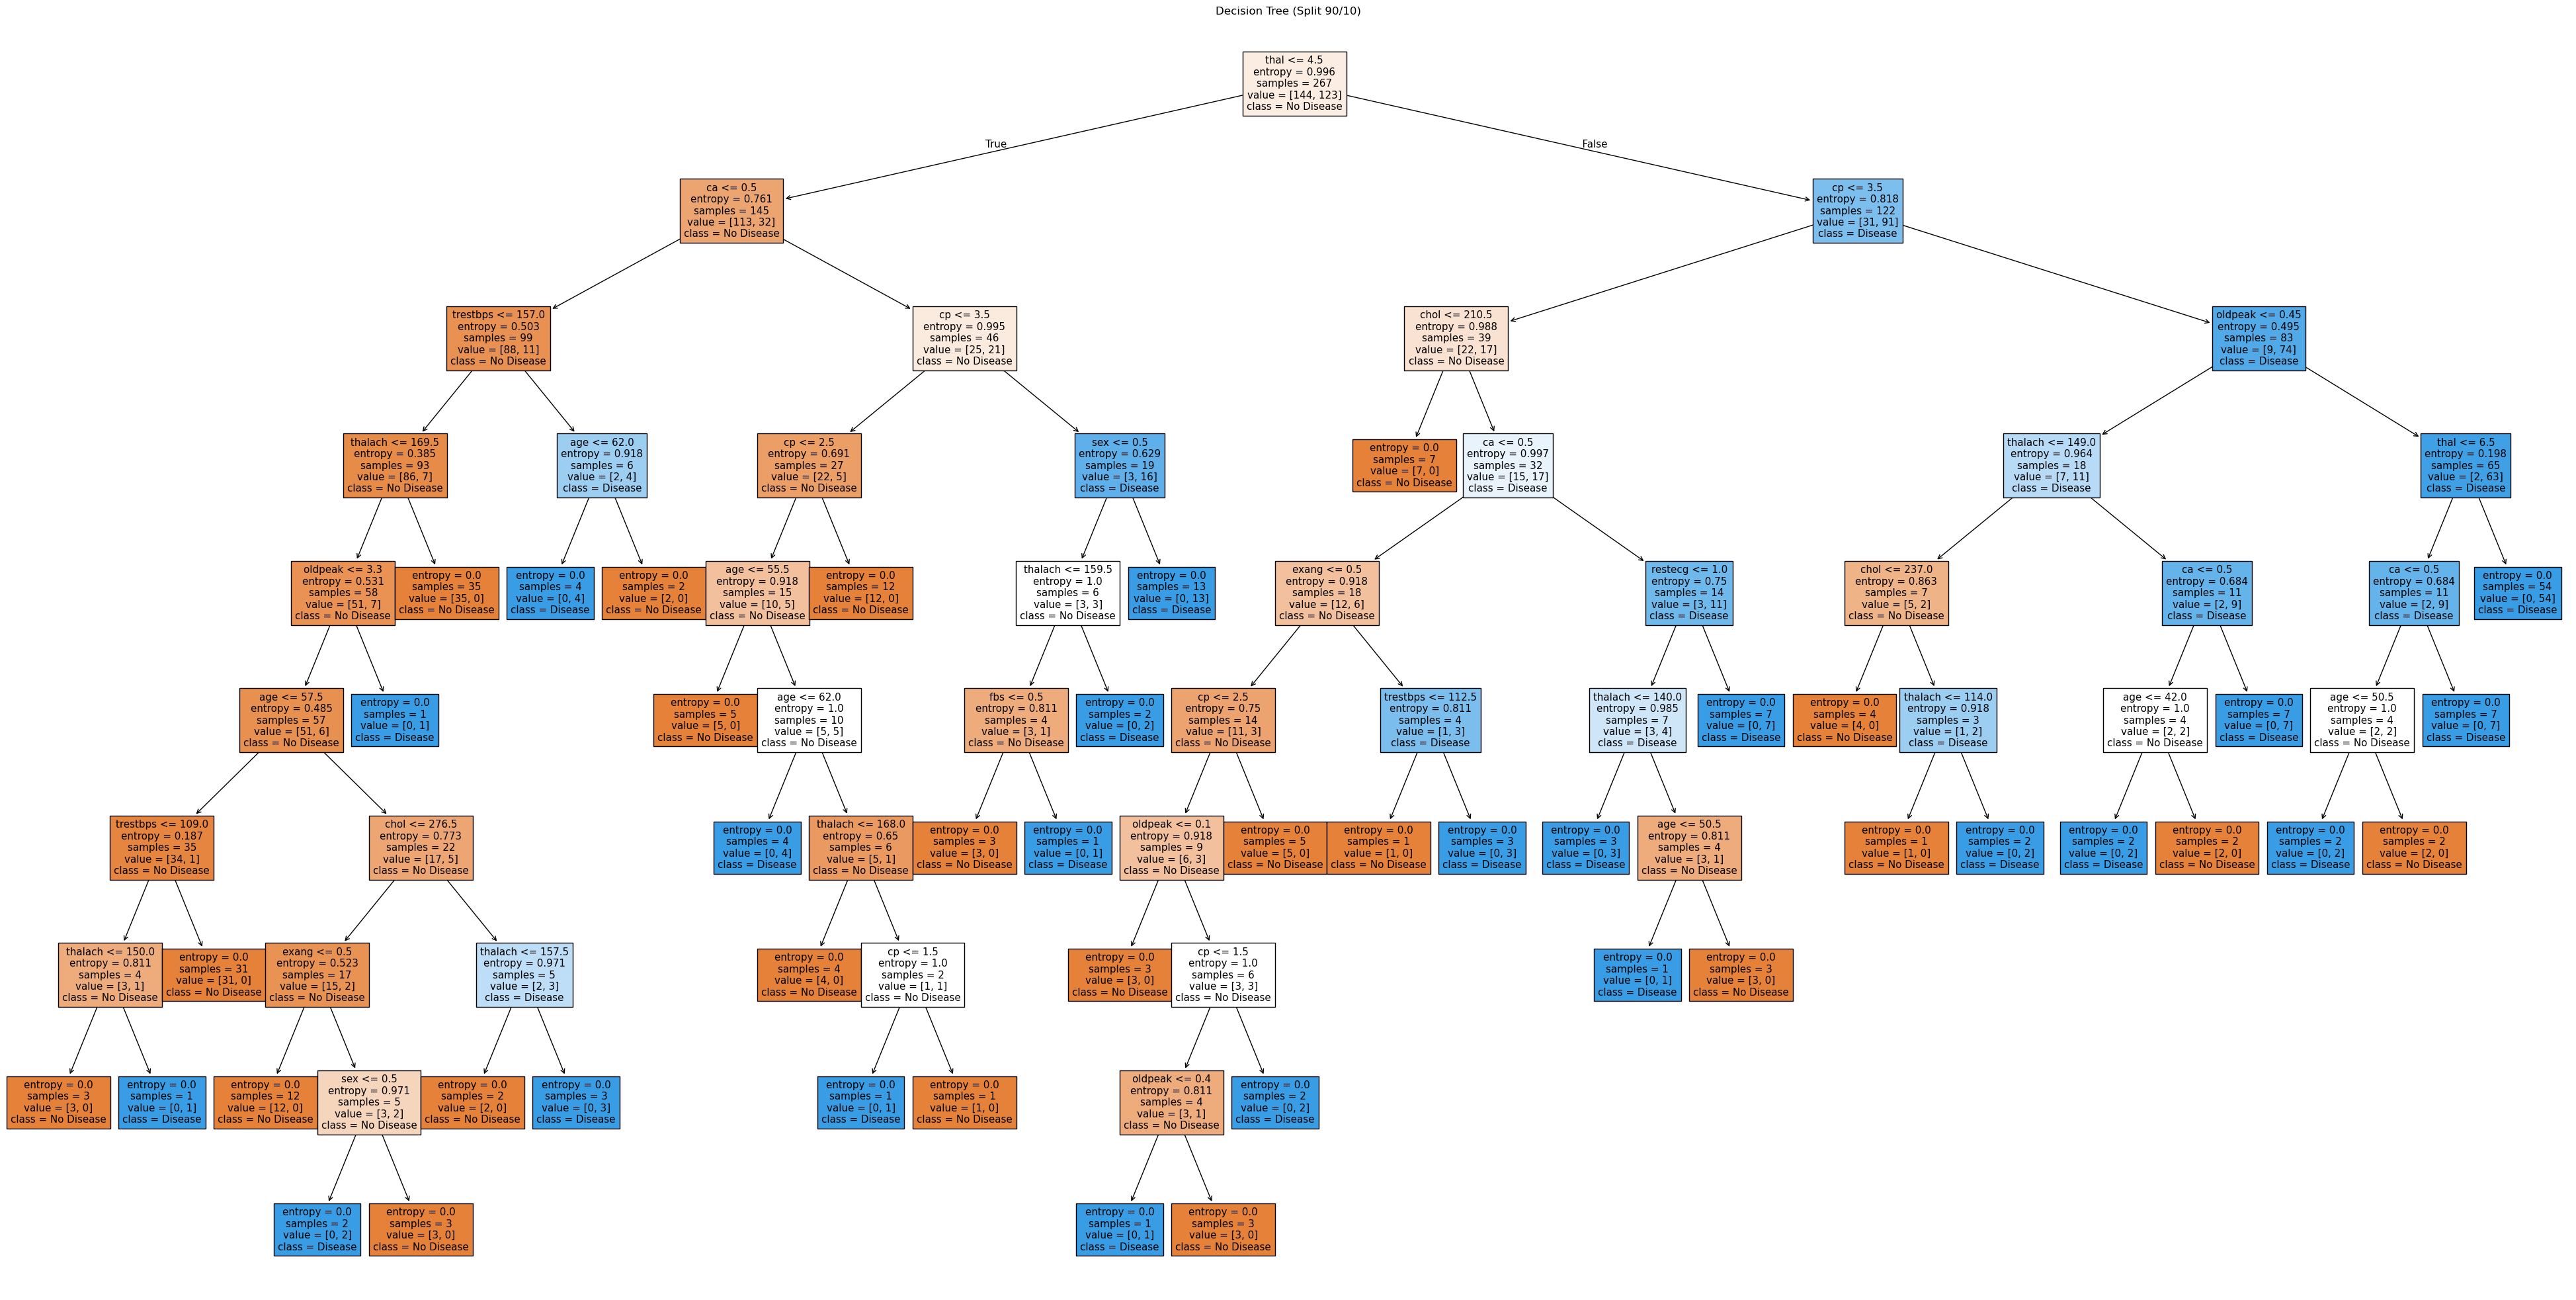

In [276]:
trees = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(subsets):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    trees.append((clf, X_train, X_test, y_train, y_test))

    # Plot tree (first none levels)
    plt.figure(figsize=(50,25))
    plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, max_depth=None)
    plt.title(f"Decision Tree (Split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

## 5. Evaluating the decision tree classifiers

### 📌 Evaluation Metrics Formulas:

- **Precision**:
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall**:
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-Score**:
  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **Accuracy**:
  $$
  \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Samples}}
  $$


=== Evaluation for split 40/60 ===
              precision    recall  f1-score   support

  No Disease       0.77      0.82      0.80        96
     Disease       0.78      0.72      0.75        83

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



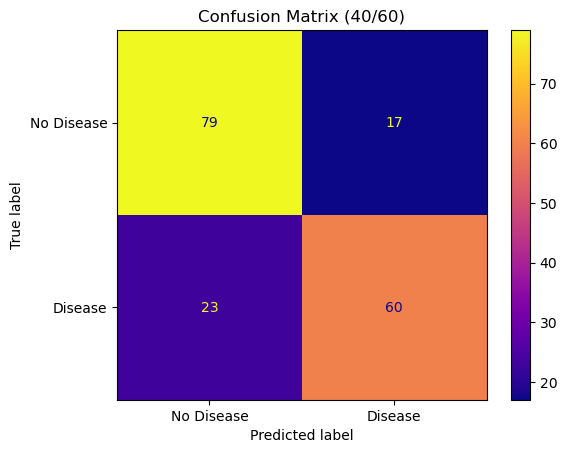

=== Evaluation for split 60/40 ===
              precision    recall  f1-score   support

  No Disease       0.72      0.86      0.79        64
     Disease       0.79      0.62      0.69        55

    accuracy                           0.75       119
   macro avg       0.76      0.74      0.74       119
weighted avg       0.75      0.75      0.74       119



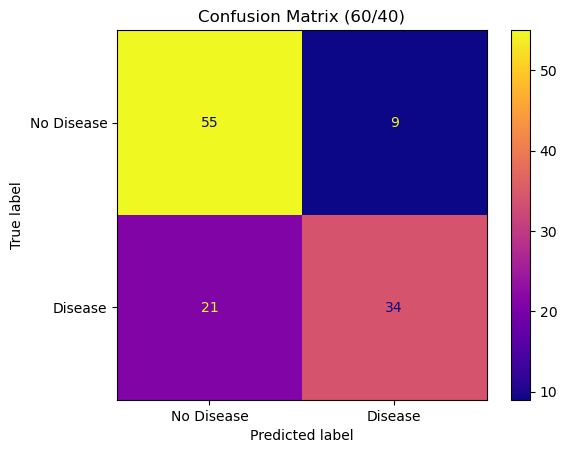

=== Evaluation for split 80/20 ===
              precision    recall  f1-score   support

  No Disease       0.80      0.75      0.77        32
     Disease       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



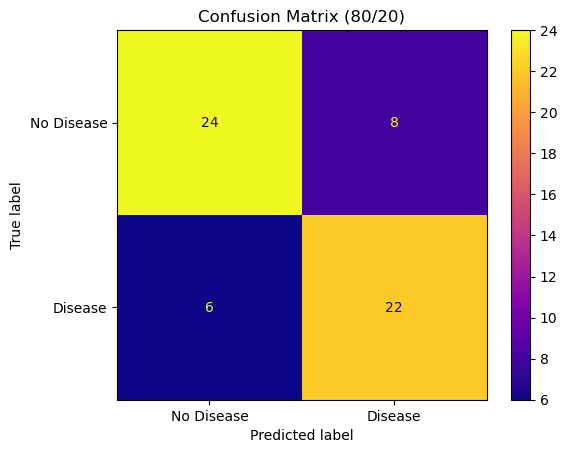

=== Evaluation for split 90/10 ===
              precision    recall  f1-score   support

  No Disease       0.68      0.81      0.74        16
     Disease       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30



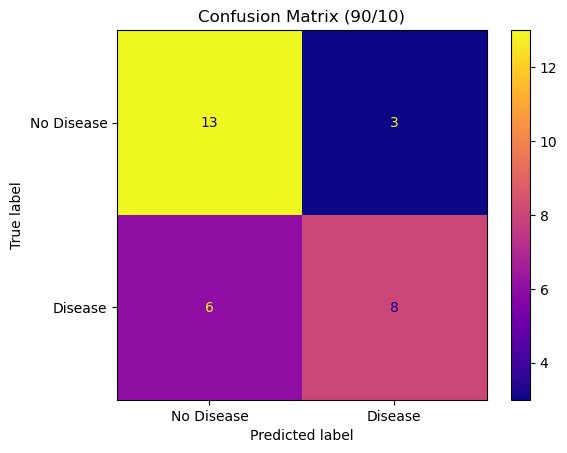

In [282]:
for idx, (clf, X_train, X_test, y_train, y_test) in enumerate(trees):
    y_pred = clf.predict(X_test)
    print(f"=== Evaluation for split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)} ===")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Disease', 'Disease'])
    disp.plot(cmap='plasma')
    plt.title(f"Confusion Matrix ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

## 6. The depth and accuracy of a decision tree

In [278]:
X_train, X_test, y_train, y_test = subsets[2]  # 80/20 split

depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

## Train decision trees on the 80/20 split dataset with varying depths.

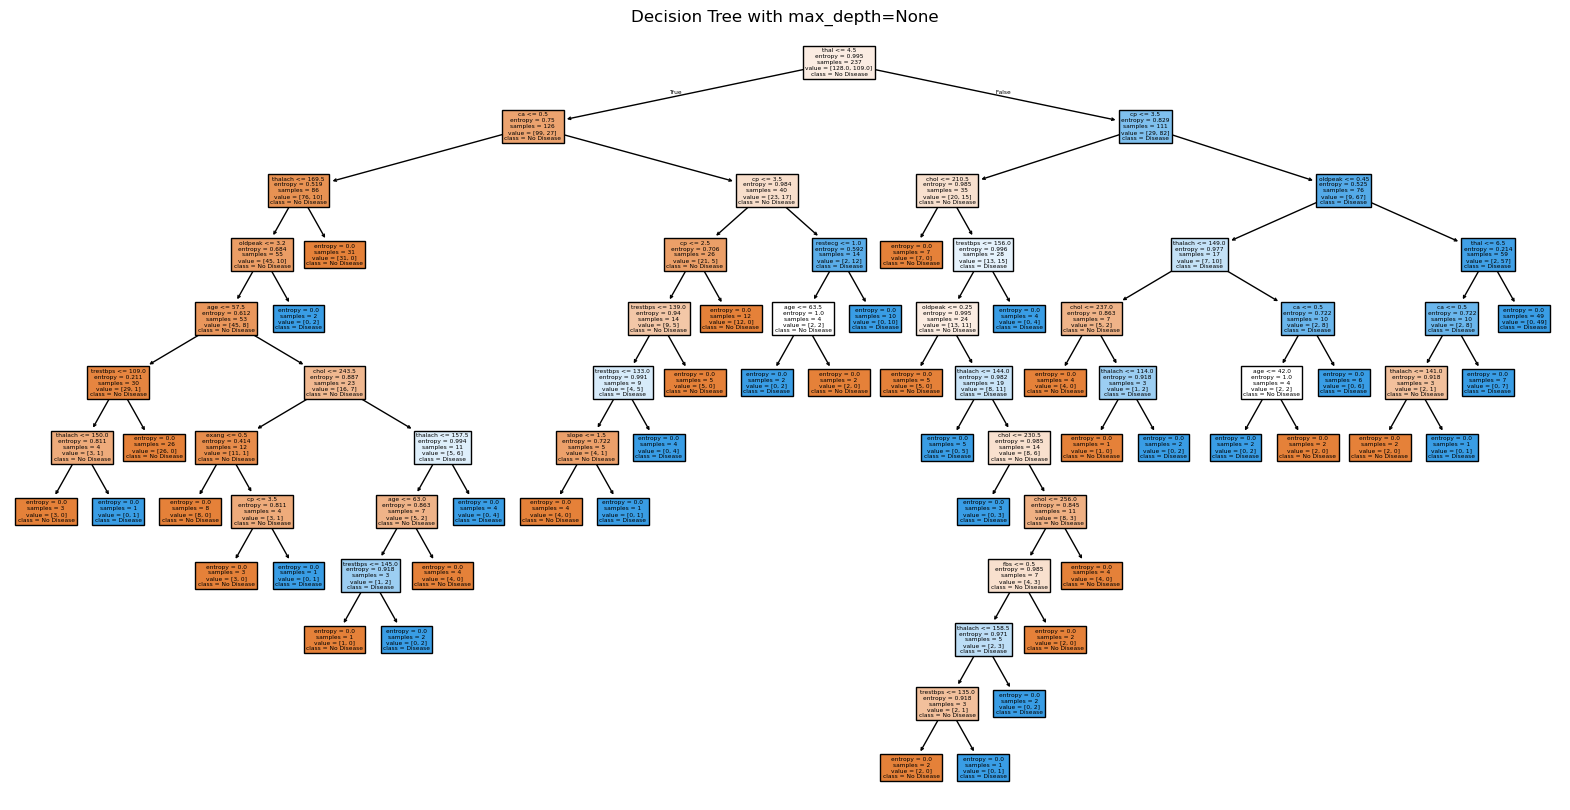

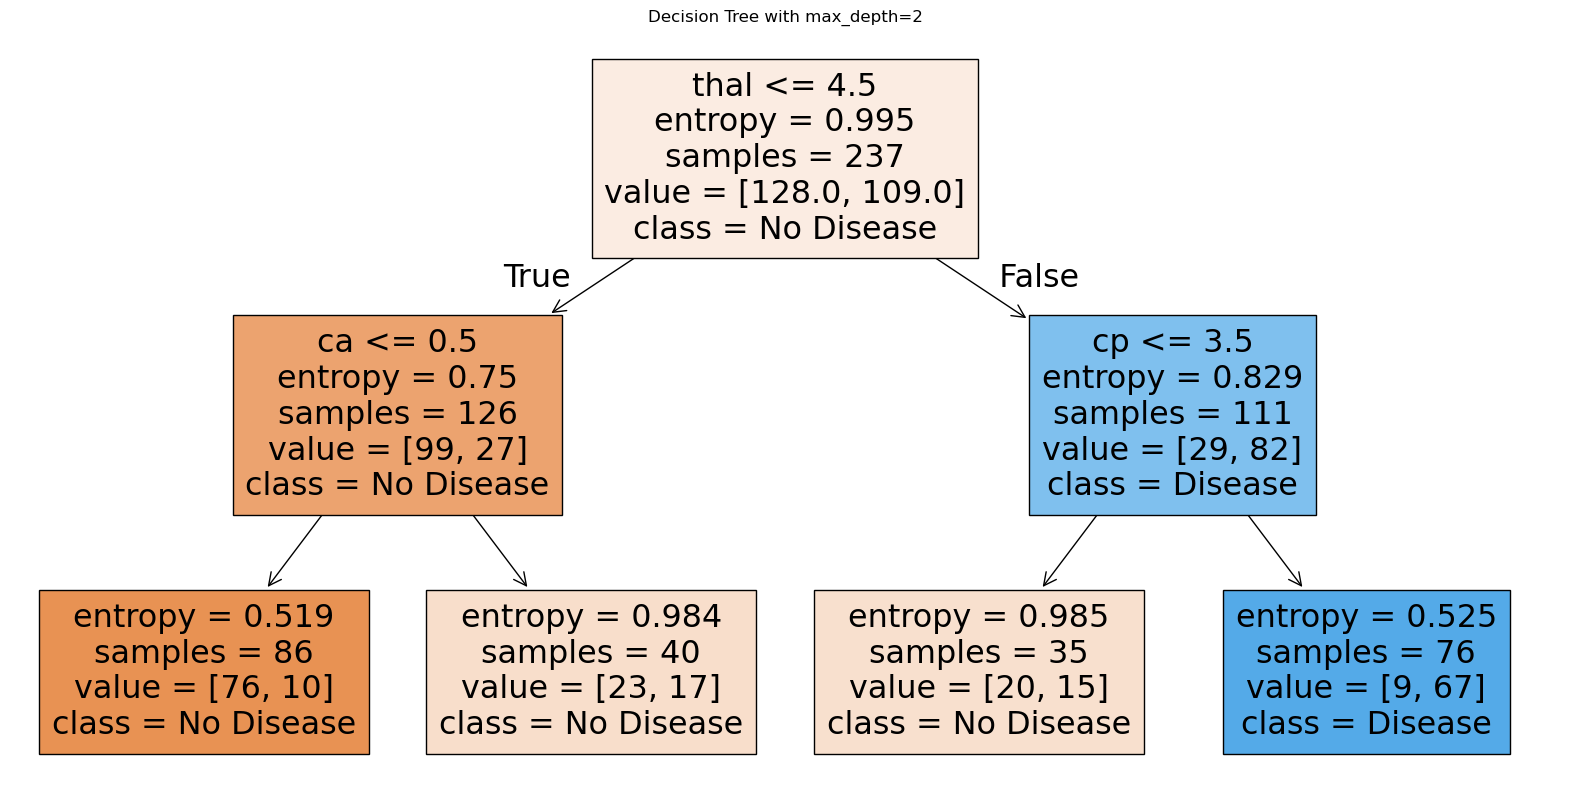

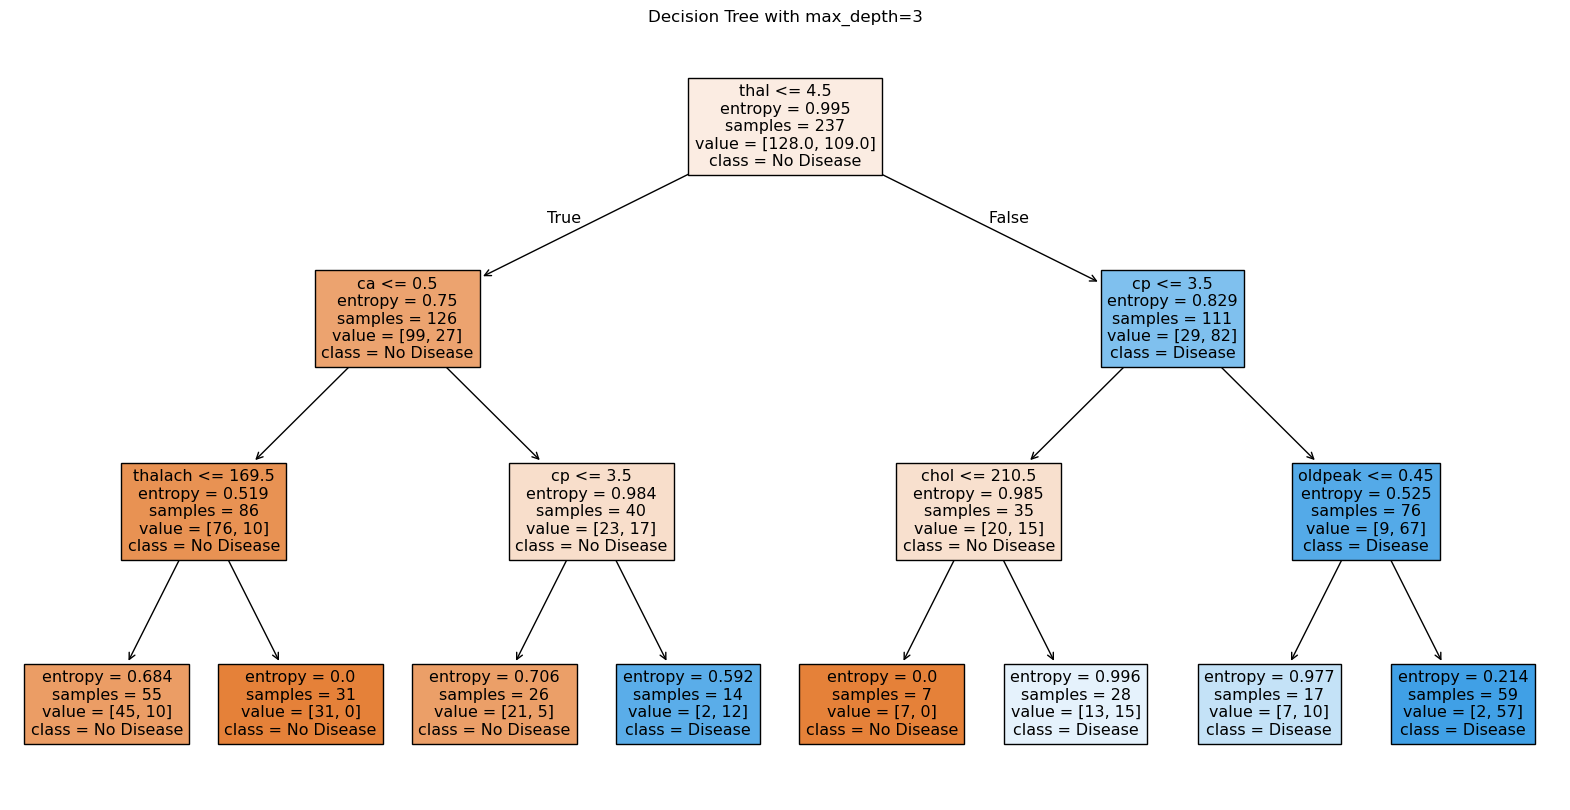

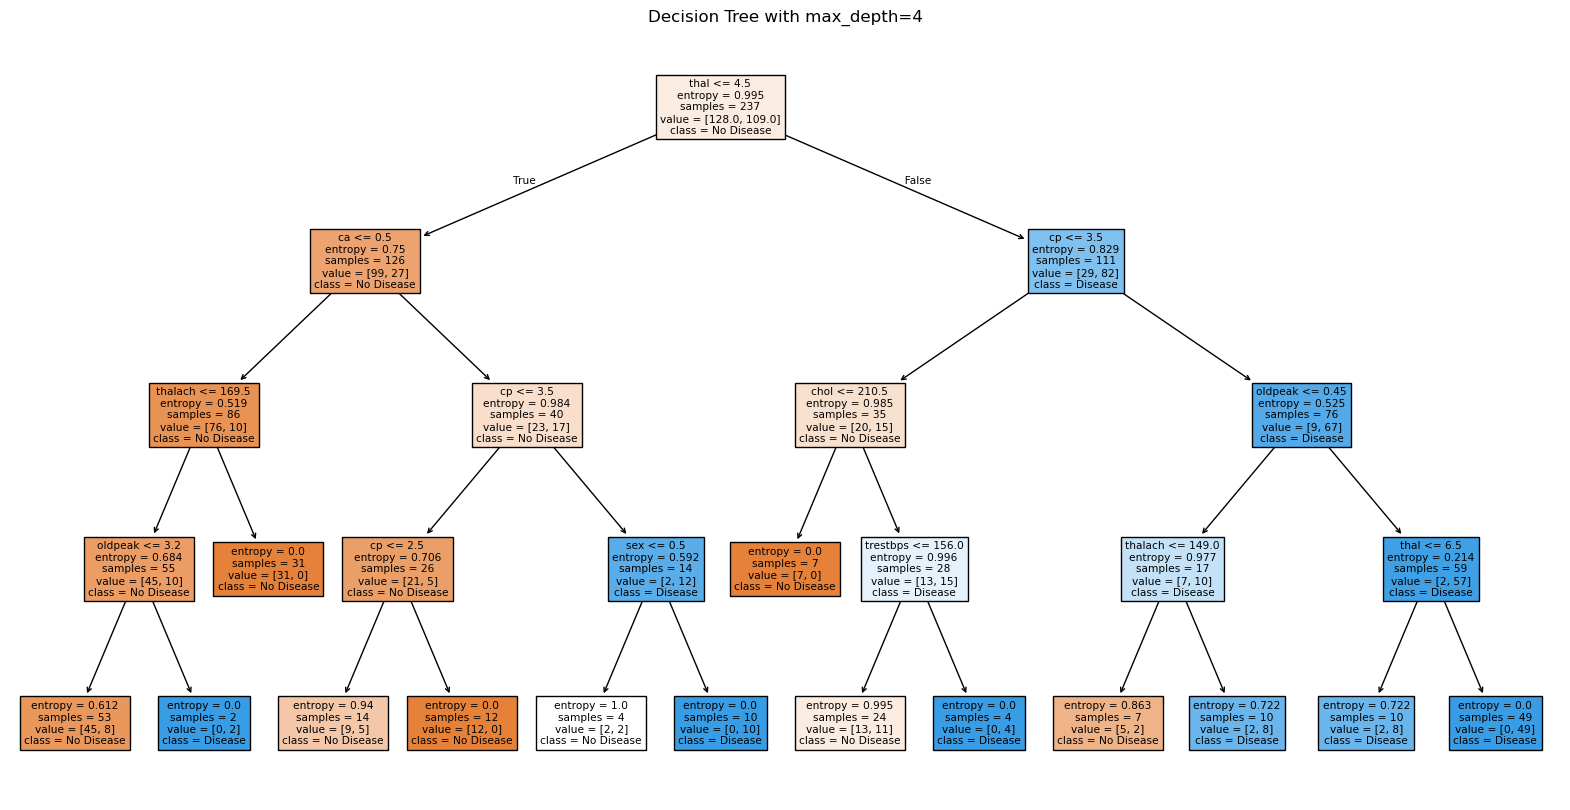

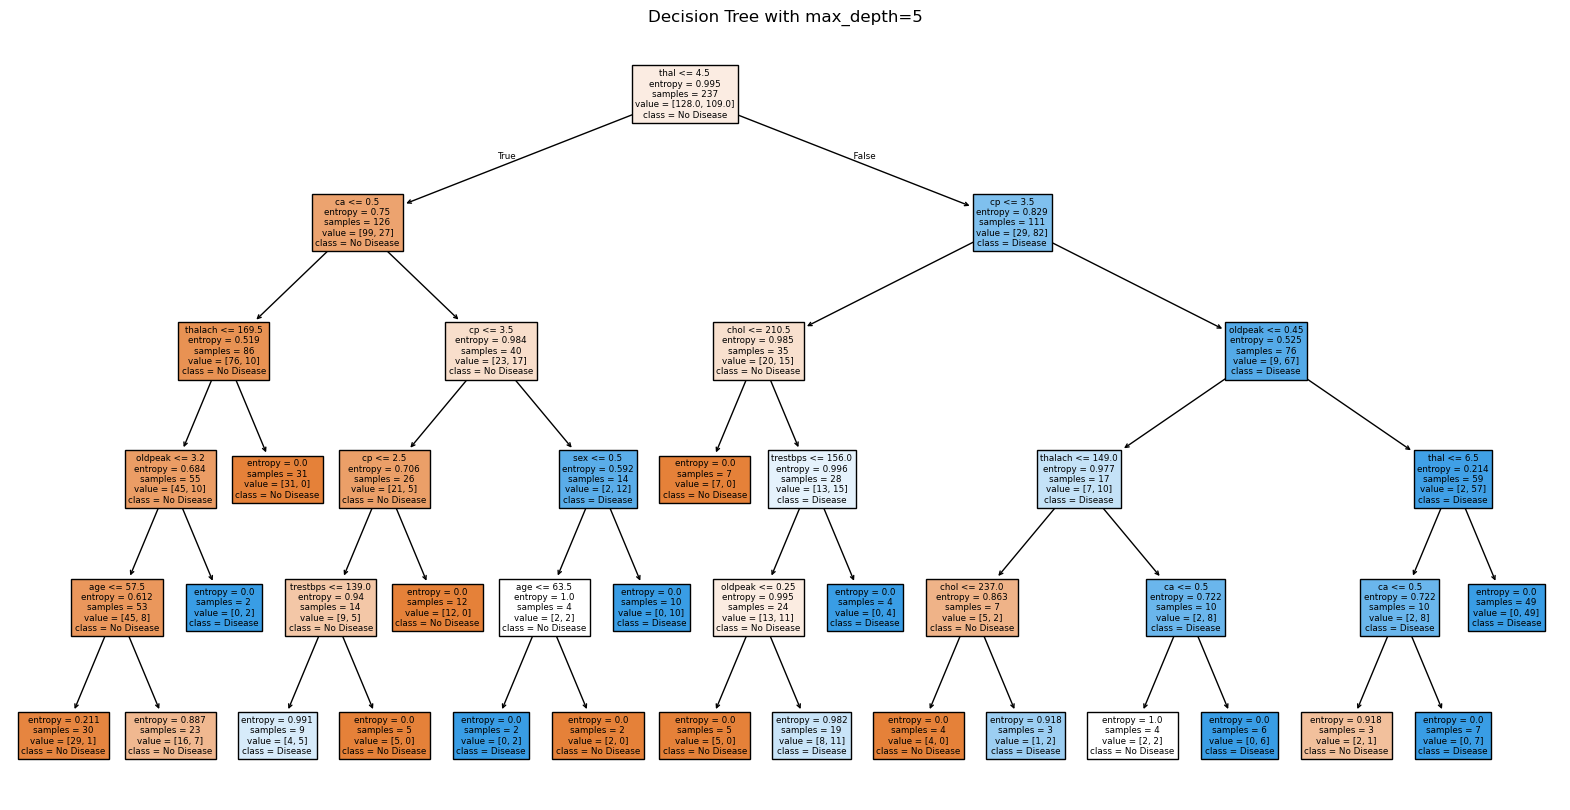

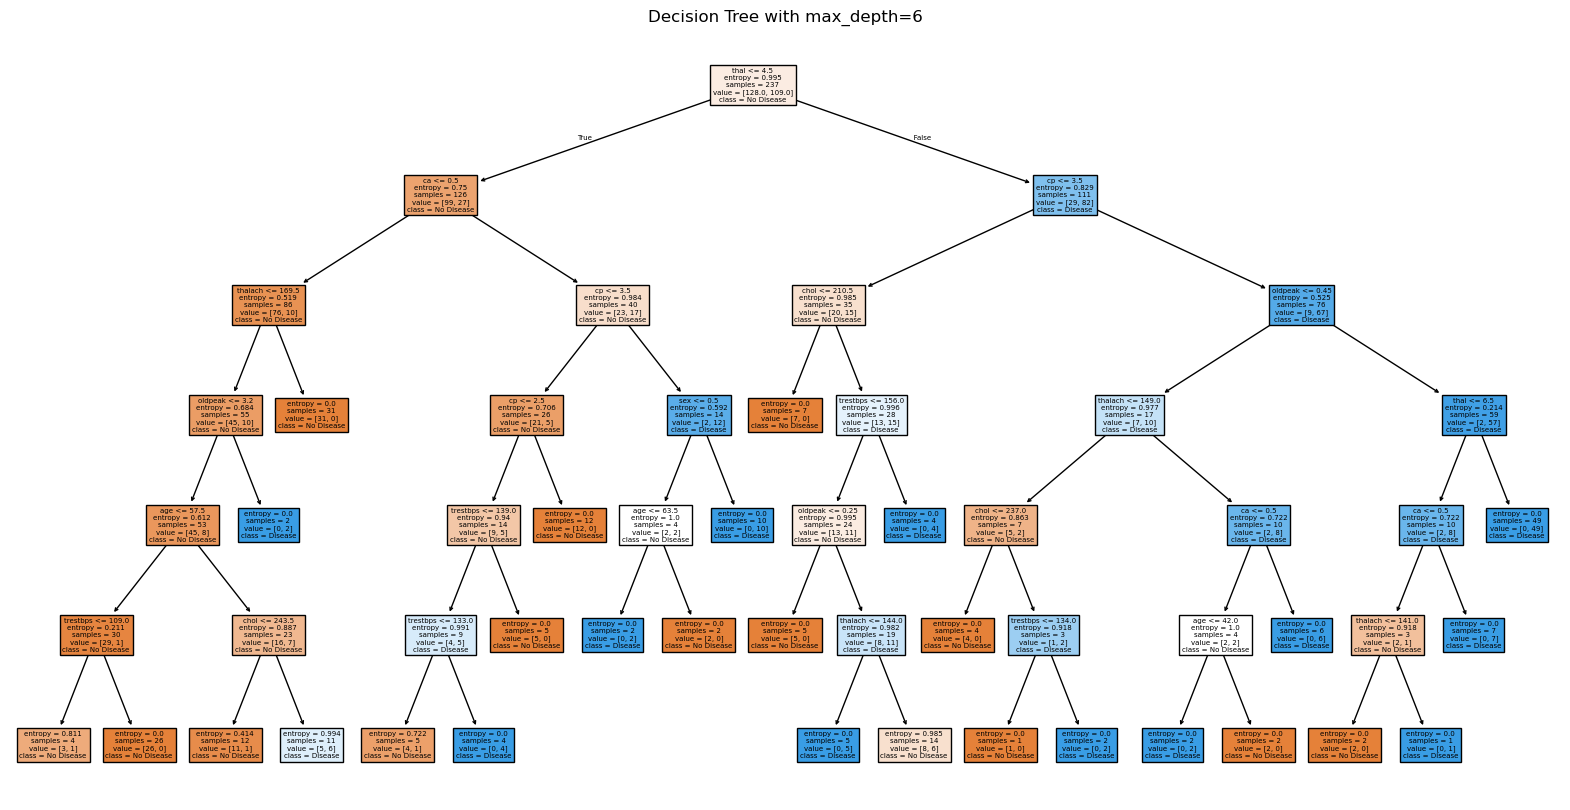

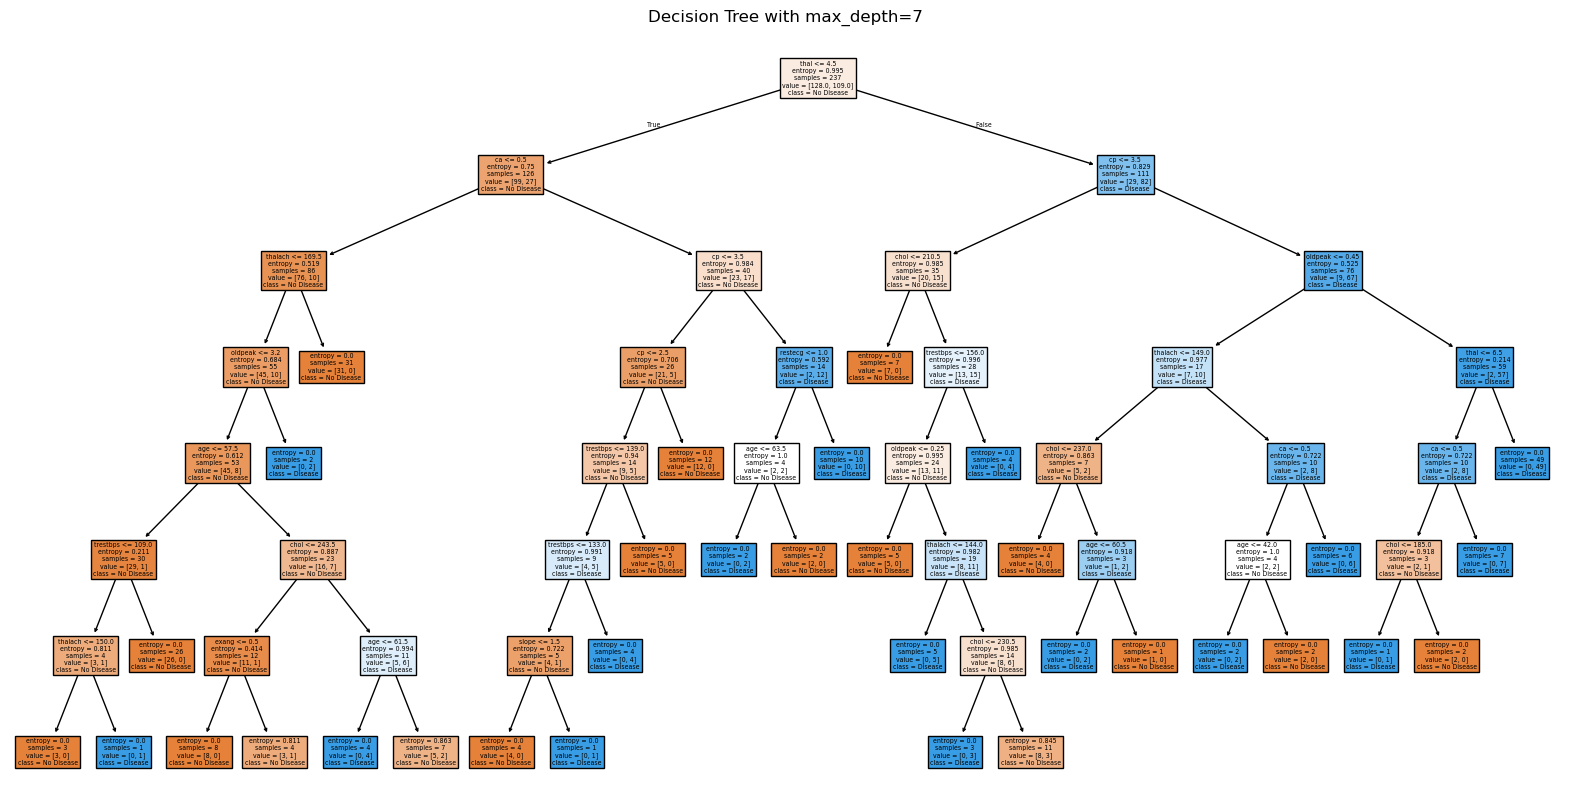

In [279]:
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()

## Plot accuracy vs max_depth

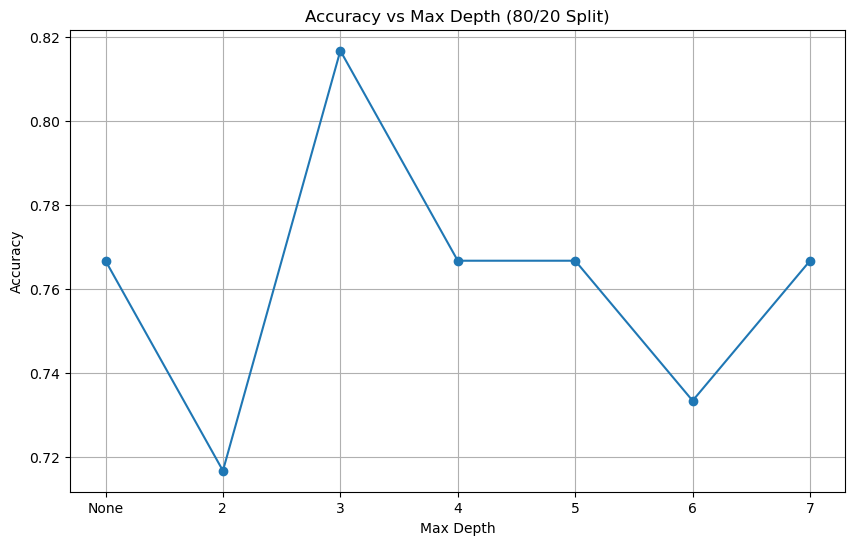

In [280]:
plt.figure(figsize=(10,6))
plt.plot(['None', 2, 3, 4, 5, 6, 7], accuracies, marker='o')
plt.title("Accuracy vs Max Depth (80/20 Split)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Print accuracy table

In [281]:
print("\nAccuracy by max_depth:")
for d, acc in zip(['None',2,3,4,5,6,7], accuracies):
    print(f"Depth {d}: {acc:.4f}")


Accuracy by max_depth:
Depth None: 0.7667
Depth 2: 0.7167
Depth 3: 0.8167
Depth 4: 0.7667
Depth 5: 0.7667
Depth 6: 0.7333
Depth 7: 0.7667
